<a href="https://colab.research.google.com/github/vijay638233/Vijaya_INFO5731_Fall2024/blob/main/INFO5731_Exercise_4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
#Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import warnings
import os
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
nltk.download('stopwords')
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#Sample movie reviews dataset in text format
data = {
    'review':[
        "I loved this movie! The actors were amazing",
        "This was the worst purchase I have ever made",
        "Its okay, the movie did not reach my expectations",
        "Highly recommend! Amazing screenplay, direction and acting by the actors",
        "Dont watch this movie. Its a total time waste!",
        "Just Superb. Amazing Story",
        "Just wasted three hours of my valuable time!",
        "Not bad, the movie was okay for the first half",
        "Dont skip this movie! Everyone must watch it.",
        "The movie is a total flop. No story, no screenplay, and the actors did not do justice for their roles",

    ],
    'sentiment':[
        'positive',
        'negative',
        'neutral',
        'positive',
        'negative',
        'positive',
        'negative',
        'neutral',
        'positive',
        'negative'
    ]
}
#Creating the DataFrame to extract the features
df = pd.DataFrame(data)
corpus = df['review'].values.tolist()
stop_words = set(stopwords.words("english"))
lda_text = [[word for word in document.lower().split() if word not in stop_words] for document in corpus]

#Creating a dictionary
lda_dictionary = corpora.Dictionary(lda_text)
lda_matrix = [lda_dictionary.doc2bow(text) for text in lda_text]

def lda_coherence(lda_dictionary,lda_matrix,lda_text,start=2, limit=10,step=1):
    lda_coherence_values = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=lda_matrix,id2word=lda_dictionary,num_topics=num_topics,random_state=100)
        lda_coherence_model = CoherenceModel(model=lda_model, texts=lda_text, dictionary=lda_dictionary,coherence="c_v")
        lda_coherence_values.append((num_topics,lda_coherence_model.get_coherence()))
    return lda_coherence_values

lda_coherence_values = lda_coherence(lda_dictionary,lda_matrix,lda_text)
k_values = max(lda_coherence_values,key=lambda item: item[1])[0]

lda = LdaModel(corpus=lda_matrix,id2word=lda_dictionary,num_topics=k_values,random_state=100)
k_topics = lda.print_topics()

print(f"The LDA Model topics")
for item,topic in k_topics:
    print(f"Topic number {item} : {topic}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The LDA Model topics
Topic number 0 : 0.024*"movie" + 0.024*"amazing" + 0.024*"superb." + 0.024*"movie!" + 0.024*"ever" + 0.024*"dont" + 0.024*"watch" + 0.024*"worst" + 0.024*"screenplay," + 0.024*"total"
Topic number 1 : 0.071*"watch" + 0.071*"movie!" + 0.071*"dont" + 0.071*"skip" + 0.071*"must" + 0.071*"it." + 0.071*"everyone" + 0.071*"expectations" + 0.071*"movie" + 0.071*"reach"
Topic number 2 : 0.024*"superb." + 0.024*"actors" + 0.024*"amazing" + 0.024*"movie" + 0.024*"ever" + 0.024*"reach" + 0.024*"movie!" + 0.024*"watch" + 0.024*"screenplay," + 0.024*"half"
Topic number 3 : 0.115*"time!" + 0.115*"wasted" + 0.115*"valuable" + 0.115*"three" + 0.115*"hours" + 0.011*"movie" + 0.011*"watch" + 0.011*"screenplay," + 0.011*"amazing" + 0.011*"superb."
Topic number 4 : 0.117*"actors" + 0.117*"amazing" + 0.079*"screenplay," + 0.042*"movie" + 0.042*"total" + 0.042*"story," + 0.042*"justice" + 0.042*"acting" + 0.042*"highly" + 0.042*"roles"
Topic number 5 : 0.024*"movie" + 0.024*"amazing" + 

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

lsa_vectorizer = CountVectorizer(stop_words='english')
lsa_matrix = lsa_vectorizer.fit_transform(corpus)
lsa_text = [text.split() for text in corpus]
lsa_dictionary = Dictionary(lsa_text)


def lsa_coherence(lsa_matrix,lsa_text,lsa_dictionary,start=2,limit=10,step=1):
    lsa_coherence_values = []
    for num_topics in range(start, limit, step):
        lsa_model = TruncatedSVD(n_components=num_topics,random_state=100)
        lsa_model.fit(lsa_matrix)
        lsa_topics = []
        for component in lsa_model.components_:
            lsa_terms = [lsa_vectorizer.get_feature_names_out()[i] for i in component.argsort()[-10:]]
            lsa_topics.append(lsa_terms)
        lsa_coherence_model = CoherenceModel(topics=lsa_topics,texts=lsa_text,dictionary=lsa_dictionary,coherence='c_v')
        lsa_coherence_values.append((num_topics,lsa_coherence_model.get_coherence()))
    return lsa_coherence_values

lsa_coherence_values = lsa_coherence(lsa_matrix,lsa_text,lsa_dictionary)
lsa_k_values = max(lsa_coherence_values,key=lambda item: item[1])[0]

lsa = TruncatedSVD(n_components=lsa_k_values,random_state=100)
lsa.fit(lsa_matrix)

print(f"The LSA Model topics")
for item,topic in enumerate(lsa.components_):
    lsa_item = [lsa_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic number {item} : {lsa_item}")

The LSA Model topics
Topic number 0 : ['flop', 'justice', 'roles', 'amazing', 'story', 'screenplay', 'did', 'total', 'actors', 'movie']
Topic number 1 : ['flop', 'superb', 'story', 'acting', 'recommend', 'highly', 'direction', 'screenplay', 'actors', 'amazing']


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code
from bertopic import BERTopic
bertopic_model = BERTopic()
ber_topics,_ = bertopic_model.fit_transform(corpus)

bertopic_information = bertopic_model.get_topic_info()
print(bertopic_information)

   Topic  Count                   Name  \
0     -1     10  -1_the_movie_this_not   

                                      Representation  \
0  [the, movie, this, not, amazing, actors, for, ...   

                                 Representative_Docs  
0  [I loved this movie! The actors were amazing, ...  


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

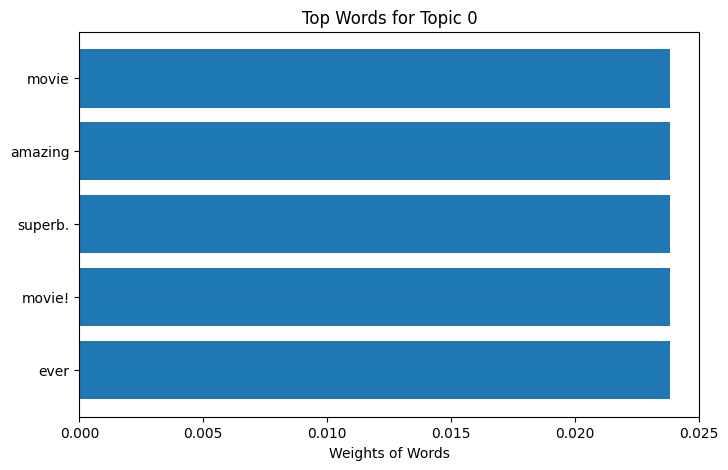

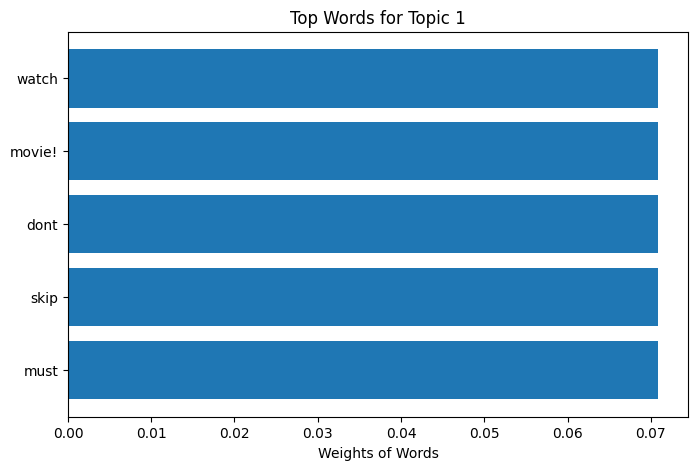

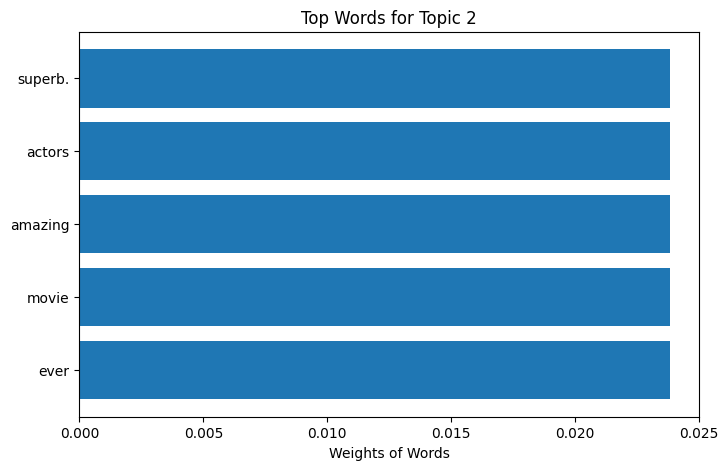

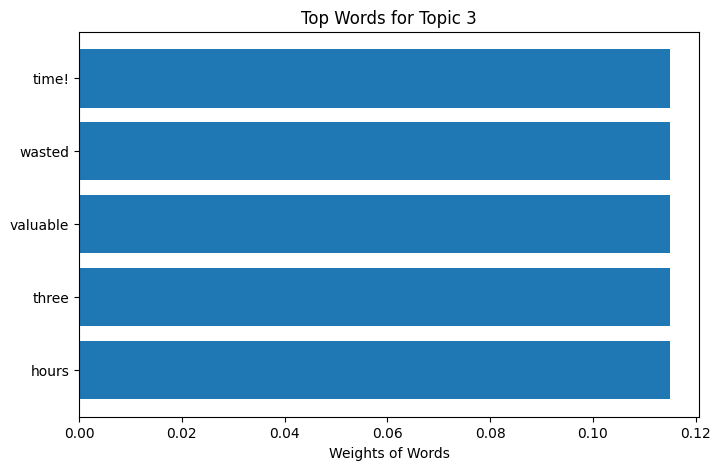

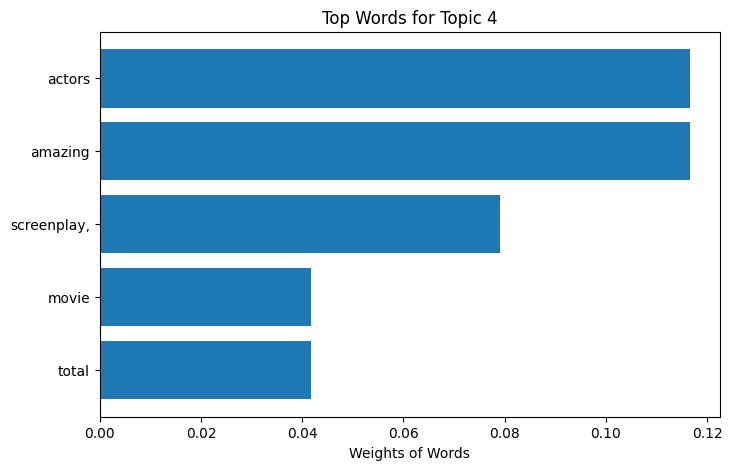

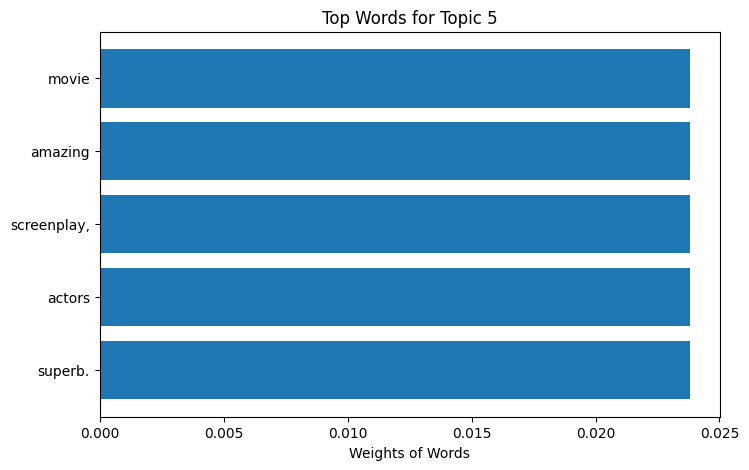

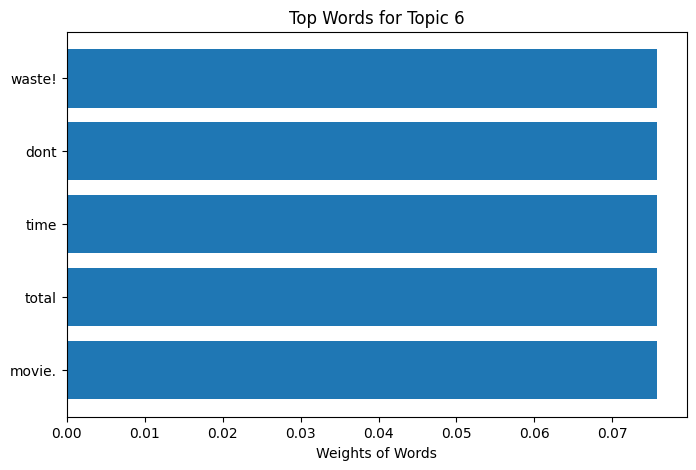

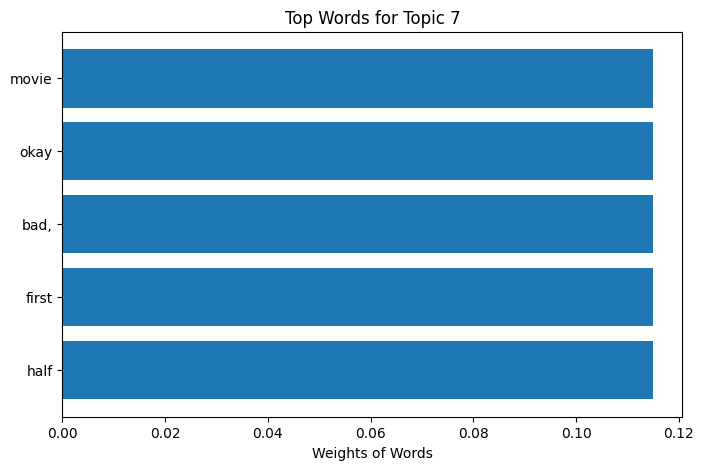

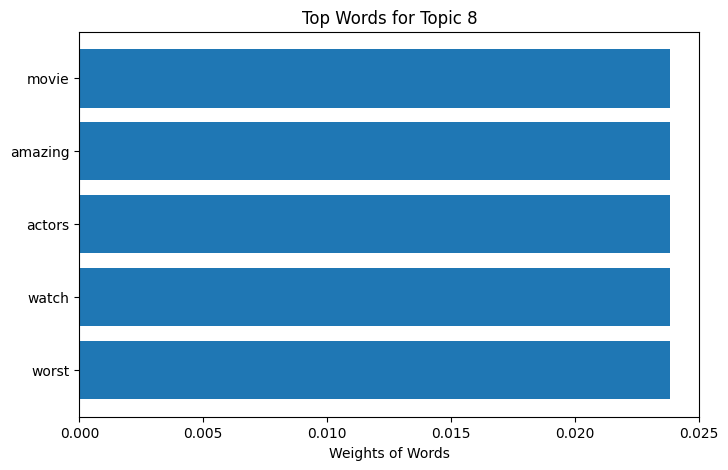

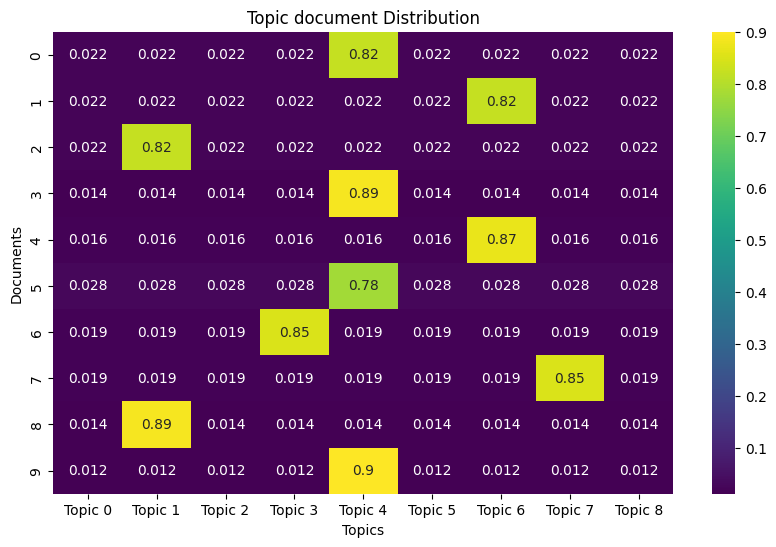

In [ ]:
# Write your code here
#Plotting topic frequency for Topics by LDA
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

#Topic word distribution

for item,topic in lda.show_topics(formatted=False,num_words=5):
    words, weights = zip(*topic)
    plt.figure(figsize=(8,5))
    plt.barh(words,weights)
    plt.xlabel('Weights of Words')
    plt.title(f'Top Words for Topic {item}')
    plt.gca().invert_yaxis()
    plt.show()
# Then Explain the visualization

#The topic word distribution visualization is a bit different as it combines the use of word clouds and bar charts to display the top N most weighty words for every topic. The weight of each word demonstrates its importance within the topic, with higher numbers meaning a stronger connection. Using this view, the topic can be adequately reconstructed in a very straightforward manner by explaining the significant parts that make it up. Besides, looking at the last words helps to form the gist of the main ideas inside every situation and, further, which words often occur with what. This visualization is useful in informing which themes are encapsulated in the concerned topic, which is important as it aids in interpreting the output from LDA models.


# Repeat for the other 2 visualizations as well.

#Topic distribution for each topic
distribution = [lda.get_document_topics(document) for document in lda_matrix]

document_size = len(corpus)
array = np.zeros((document_size, k_values))

for item, topic in enumerate(distribution):
    for id, weight in topic:
        array[item, id] = weight
plt.figure(figsize=(10, 6))
sns.heatmap(array, annot=True, cmap='viridis', xticklabels=[f'Topic {i}' for i in range(k_values)])
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.title('Topic document Distribution')
plt.show()
# Then Explain the visualization
#The topic distribution heatmap clarifies how each topic is represented in each document, showing the topic weights in color. The rows depict documents while the columns illustrate topics enabling the identification of the most predominant topics in each document. The color of the cell increases based on the proportion of the topic within a document. This visual portrayal assists in understanding the topic composition at the document level including how focused or broad range the documents are. The heatmap is valuable in discerning groups of documents with the same thematic content or characteristics, thus providing an understanding of the dataset.

# Displaying intertopic distance map
lda_display = gensimvis.prepare(lda, lda_matrix, lda_dictionary)
pyLDAvis.display(lda_display)
# Then Explain the visualization

#The intertopic distance map allows users to locate the topics within a two-dimensional plane where each topic is depicted as a circle. The overall size of the circle is a measure of the topic’s dominance in the whole sample and the distance between the circles depicts the closeness between the topics. Close topics share more common words while those that are well spread out are more different. This visualization depicts the broad aspects of the relationship of the topics to one another and therefore assists in determining whether the topics are separate or overlapped echoes. The intertopic distance map helps to visualize the connection between concepts thus providing an understanding of the structural topology of the theme of the corpus.



## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
Comparing the results, LDA is the most useful model for this dataset, as it is interpretive, it separates distinct themes and it is efficient in its computation. All themes are easily identifiable due to the high-weighted words that denote specific topics as shown in the visuals for topic word distribution. The heat map providing a visual for the topic distribution across the documents also elucidates the importance of different topics in a particular document which also explains documents dealing with single topics as well as those touching on several themes. Also, the intertropical distance map displays mostly well-defined topics, which is the LDA’s strong point in delineating clear-cut themes. LSA would provide a rapid and high-level outline of topics, in these datasets, it may be deficient in interpretation because overlapping terms would weaken the scope of the topic LSA is trying to address. Bringing in broader and more elaborate datasets or incorporating the more complex web of the topics themselves may eliminate this shortcoming of BERTopic, however, with a dataset this small, it may be too computationally intensive and very easy to over-fit. All in all, the LDA’s probabilistic approach fits the bill in the best possible way as the results displayed distinct and interpretable topics while carrying out the task well within no time
'''

'\nComparing the results, LDA is the most useful model for this dataset, as it is interpretive, it separates distinct themes and it is efficient in its computation. All themes are easily identifiable due to the high-weighted words that denote specific topics as shown in the visuals for topic word distribution. The heat map providing a visual for the topic distribution across the documents also elucidates the importance of different topics in a particular document which also explains documents dealing with single topics as well as those touching on several themes. Also, the intertropical distance map displays mostly well-defined topics, which is the LDA’s strong point in delineating clear-cut themes. LSA would provide a rapid and high-level outline of topics, in these datasets, it may be deficient in interpretation because overlapping terms would weaken the scope of the topic LSA is trying to address. Bringing in broader and more elaborate datasets or incorporating the more complex web 

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Learning Experience : From this particular exercise, learning various topic modeling algorithms was quite practical, and this gave insight into feature extraction as well as structuring text data. The very application of these models, and especially LDA and BERTopic, assisted in reinforcing the understanding of topic distribution, coherence scores, and word relationships in a topic. Also important were the visualizations such as heatmaps or intertopic maps in helping bridge the gaps between such vague ideas and to actual practical implications of the algorithms.

Challenges Encountered :Among the main problems encountered was the issue of different data structures across the algorithms, particularly when performing visualization of the results, in this case aligning the formats for heat maps or pyLDAvis. A further barrier was optimizing variables such as the number of topics and p-value of coherence scores so that useful outputs could be attained. The ability of each model to be useful with a small number of datasets, especially where clusters of topics are similar, was needed through modifications of the pre-processing and visualization stages.

Relevance to Your Field of Study: Topic modeling is one of the most important NLP tools, as it provides a functioning solution for the condensation and theme extraction from large bodies of text making it extremely useful for tasks like text summarization, recommender systems, content analysis, and so on. This exercise illustrated how problems related to text data can be solved using NLP by identifying ITS keywords and also demonstrated how LDA and BERTopic algorithms are used in practice. The acquired competencies are quite relevant for further studies in the NLP context particularly in branches that deal with large volumes of unstructured text data.

'''

'\nPlease write you answer here:\nLearning Experience : From this particular exercise, learning various topic modeling algorithms was quite practical, and this gave insight into feature extraction as well as structuring text data. The very application of these models, and especially LDA and BERTopic, assisted in reinforcing the understanding of topic distribution, coherence scores, and word relationships in a topic. Also important were the visualizations such as heatmaps or intertopic maps in helping bridge the gaps between such vague ideas and to actual practical implications of the algorithms.\n\nChallenges Encountered :Among the main problems encountered was the issue of different data structures across the algorithms, particularly when performing visualization of the results, in this case aligning the formats for heat maps or pyLDAvis. A further barrier was optimizing variables such as the number of topics and p-value of coherence scores so that useful outputs could be attained. Th